Teste t-student é usado para pequenas amostras

# Analisando ações com Python

In [1]:
from io import StringIO
import pandas as pd
import numpy as np
# usaremos essa biblioteca para ler os dados hitóricos das cotações
import pandas_datareader.data as web
import datetime as dt
import matplotlib.pyplot as plt
import mplfinance as mpf
import matplotlib.dates as mdates
from matplotlib import style

style.use('ggplot')

In [2]:
start = dt.datetime(2020, 1, 1)
end = dt.datetime.now()

In [3]:
# aqui adicionamos os argumentos: nome da ação, api fonte da informação, data de inicio e data de fim
df = web.DataReader('ABEV3.SA', 'yahoo', start, end)

In [4]:
df = df.round(2)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,19.25,18.78,18.86,19.20,16011300.0,18.62
2020-01-03,19.16,18.89,18.95,18.93,20059000.0,18.35
2020-01-06,19.17,18.69,18.86,19.02,14644300.0,18.44
2020-01-07,19.23,18.86,19.05,19.06,18036600.0,18.48
2020-01-08,19.16,18.86,19.09,18.97,14051700.0,18.39


Podemos converter nossos dados para um arquivo CSV

In [5]:
df.to_csv('ambev.csv')

Plotando os dados

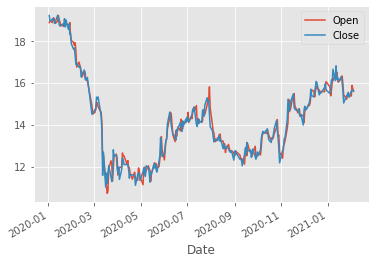

In [6]:
df[['Open','Close']].plot();

Media Movel

Vamos tirar uma media movel das ações numa janela de cada 100 dias

O parametro min_period abaixo tem o valor 0, o que indica que os primeiros 100 valores do cálculo não velarão NaN, mas sim seu valor individual

In [7]:
df['100ma'] = df['Adj Close'].rolling(window=100, min_periods=0).mean()

<AxesSubplot:xlabel='Date'>

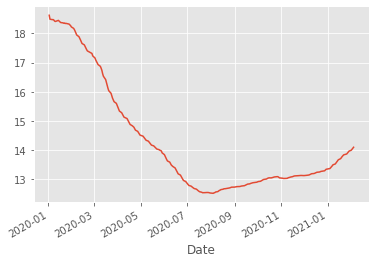

In [8]:
df['100ma'].plot()

**Ações Ambev**

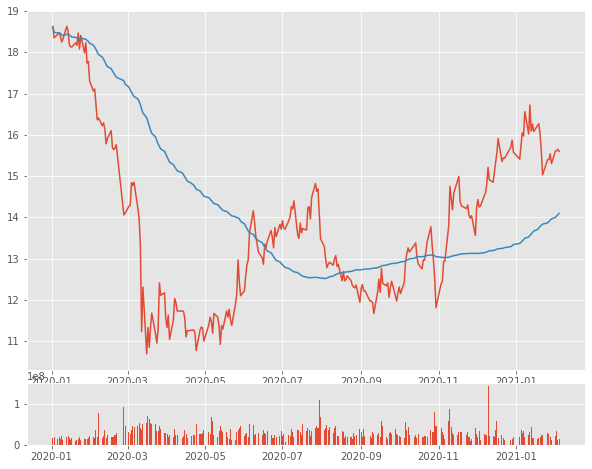

In [9]:
plt.figure(figsize=(10,8))

ax1 = plt.subplot2grid((6, 1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6, 1), (5,0), rowspan=1, colspan=1, sharex=ax1)

ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['100ma'])
ax2.bar(df.index, df['Volume']);

**Candlesticks**

Vamos plotar agora gráfico de candlesticks, muito utilizado por traders para análise de ações.

Esse tipo de gráfico traz bastante informação agregada, tais como preço de abertura, fechamenta, máxima e mínima.

In [39]:
df_ohlc = df['Adj Close'].resample('10D').ohlc()
df_volume = df['Volume'].resample('10D').sum()
df_ohlc.reset_index(inplace=True)
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)

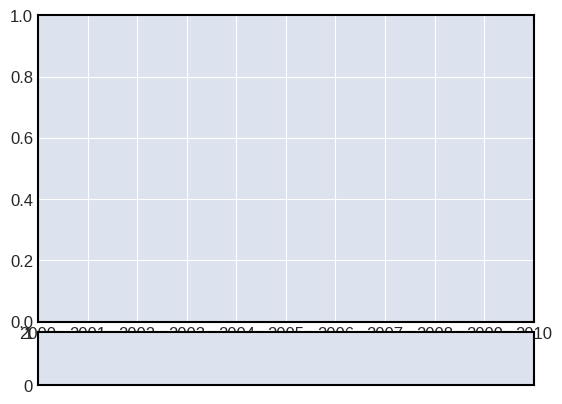

In [45]:
ax1 = plt.subplot2grid((6, 1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6, 1), (5,0), rowspan=1, colspan=1, sharex=ax1)

ax1.xaxis_date()

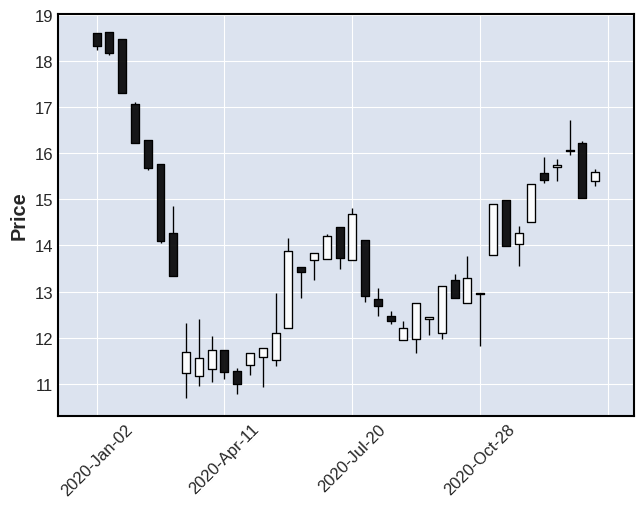

In [42]:
df_ohlc = df['Adj Close'].resample('10D').ohlc()
df_volume = df['Volume'].resample('10D').sum()
mpf.plot(df_ohlc, type='candle');

[Link proximo video](https://www.youtube.com/watch?v=C--57BP79EM&list=PLQVvvaa0QuDcOdF96TBtRtuQksErCEBYZ&index=5)